In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('datasets/matches.csv')

In [5]:
pd.set_option('display.max_column',None)

In [7]:
df.shape

(4788, 28)

In [9]:
df=df.drop(columns=['Unnamed: 0','date','time','gf','ga','xga','attendance','formation','match report','notes','comp'])

In [11]:
df.shape

(4788, 17)

In [13]:
df.head()

,round,day,venue,result,opponent,xg,poss,captain,referee,sh,sot,dist,fk,pk,pkatt,season,team
0,Matchweek 2,Mon,Away,W,Wolves,1.9,65,Fernandinho,Andre Marriner,13,8,21.1,2,1,1,2024,Manchester City
1,Matchweek 3,Sun,Home,L,Leicester City,0.9,72,Fernandinho,Michael Oliver,16,5,19.8,1,0,0,2024,Manchester City
2,Matchweek 4,Sat,Away,D,Leeds United,1.2,49,Kevin De Bruyne,Mike Dean,23,1,18.2,1,0,0,2024,Manchester City
3,Matchweek 5,Sat,Home,W,Arsenal,1.3,58,Raheem Sterling,Chris Kavanagh,13,5,17.7,0,0,0,2024,Manchester City
4,Matchweek 6,Sat,Away,D,West Ham,1.0,69,Raheem Sterling,Anthony Taylor,14,7,20.9,1,0,0,2024,Manchester City


In [17]:
value=df['captain'].value_counts()
target=value[value>100].index.tolist()

In [19]:
import numpy as np

In [21]:
df=df[df['captain'].isin(target)]

In [23]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Count'>

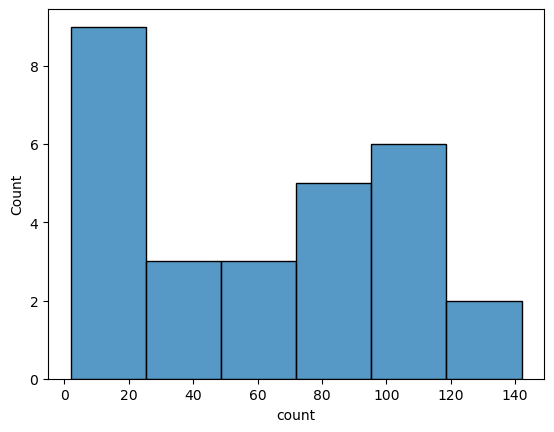

In [24]:
sns.histplot(df['referee'].value_counts())

In [27]:
df.head(3)

,round,day,venue,result,opponent,xg,poss,captain,referee,sh,sot,dist,fk,pk,pkatt,season,team
38,Matchweek 2,Sat,Home,L,Crystal Palace,1.2,75,Harry Maguire,Martin Atkinson,17,4,20.2,1,0,0,2024,Manchester United
39,Matchweek 3,Sat,Away,W,Brighton,1.5,47,Harry Maguire,Chris Kavanagh,6,2,18.2,0,1,1,2024,Manchester United
40,Matchweek 4,Sun,Home,L,Tottenham,0.9,39,Harry Maguire,Anthony Taylor,4,1,25.4,0,1,1,2024,Manchester United


In [29]:
value=df['referee'].value_counts()

In [31]:
df['referee'].unique().size

28

In [33]:
target=value[value>50].index.tolist()

In [35]:
df=df[df['referee'].isin(target)]

In [37]:
df.shape

(1504, 17)

In [39]:
df.head()

,round,day,venue,result,opponent,xg,poss,captain,referee,sh,sot,dist,fk,pk,pkatt,season,team
38,Matchweek 2,Sat,Home,L,Crystal Palace,1.2,75,Harry Maguire,Martin Atkinson,17,4,20.2,1,0,0,2024,Manchester United
39,Matchweek 3,Sat,Away,W,Brighton,1.5,47,Harry Maguire,Chris Kavanagh,6,2,18.2,0,1,1,2024,Manchester United
40,Matchweek 4,Sun,Home,L,Tottenham,0.9,39,Harry Maguire,Anthony Taylor,4,1,25.4,0,1,1,2024,Manchester United
41,Matchweek 5,Sat,Away,W,Newcastle Utd,2.3,63,Harry Maguire,Craig Pawson,27,11,20.5,0,0,1,2024,Manchester United
42,Matchweek 6,Sat,Home,D,Chelsea,0.6,51,Harry Maguire,Martin Atkinson,14,4,17.9,0,0,0,2024,Manchester United


In [41]:
cate=['round','day','venue','opponent','captain','referee','team']

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [45]:
categ=ColumnTransformer(
    transformers=[
    ('categories',OrdinalEncoder(),cate)
    ],remainder='passthrough'
)

pip=Pipeline(steps=[
             ('preprocess',categ)
])


In [47]:
x=df.drop(columns=['result'])
y=df['result']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x_train.head()

,round,day,venue,opponent,xg,poss,captain,referee,sh,sot,dist,fk,pk,pkatt,season,team
2820,Matchweek 9,Sat,Home,Manchester City,1.3,48,Lewis Dunk,Kevin Friend,9,4,18.9,0,1,1,2022,Brighton and Hove Albion
4219,Matchweek 2,Sat,Away,Manchester City,0.1,45,Hugo Lloris,Michael Oliver,3,2,34.9,0,0,0,2020,Tottenham Hotspur
4039,Matchweek 12,Sun,Home,Manchester City,1.1,45,Jordan Henderson,Michael Oliver,12,5,15.9,0,0,0,2020,Liverpool
3725,Matchweek 2,Mon,Home,Manchester City,0.6,35,Conor Coady,Andre Marriner,10,1,17.4,0,0,0,2021,Wolverhampton Wanderers
3613,Matchweek 4,Sat,Home,Brighton,1.6,43,Séamus Coleman,Simon Hooper,11,6,16.3,0,0,0,2021,Everton


In [53]:
x_train_trf=pip.fit_transform(x_train)
x_test_trf=pip.fit_transform(x_test)

In [55]:
x_train_trf

array([[3.700e+01, 2.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        2.022e+03],
       [1.100e+01, 2.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.020e+03],
       [3.000e+00, 3.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.020e+03],
       ...,
       [1.000e+01, 3.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        2.022e+03],
       [2.000e+01, 3.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.020e+03],
       [7.000e+00, 5.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.021e+03]])

In [370]:
from sklearn.tree import DecisionTreeClassifier


In [447]:
cls=DecisionTreeClassifier(max_depth=15,criterion='entropy')

In [449]:
cls.fit(x_train_trf,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [451]:
y_pred=cls.predict(x_test_trf)

In [453]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [455]:
print('accuracy_score...............',accuracy_score(y_test,y_pred))
print('precision_score...............',precision_score(y_test,y_pred,average='weighted'))
print('recall_score...............',recall_score(y_test,y_pred,average='weighted'))
print('f1_score...............',f1_score(y_test,y_pred,average='weighted'))
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))

accuracy_score............... 0.7541528239202658
precision_score............... 0.7818954495604862
recall_score............... 0.7541528239202658
f1_score............... 0.7604859563883519
confusion_matrix:
 [[50  5  9]
 [15 87 17]
 [24  4 90]]


In [459]:
from sklearn.model_selection import cross_val_score

In [471]:
cross_val_score(DecisionTreeClassifier(),x_train_trf,y_train,cv=10)

array([0.59504132, 0.66942149, 0.5785124 , 0.60833333, 0.64166667,
       0.675     , 0.64166667, 0.56666667, 0.66666667, 0.65833333])

In [475]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),x_train_trf,y_train,cv=10)

array([0.67768595, 0.70247934, 0.67768595, 0.675     , 0.66666667,
       0.79166667, 0.74166667, 0.65833333, 0.70833333, 0.71666667])

In [487]:
rfc=RandomForestClassifier(max_depth=15)
rfc.fit(x_train_trf,y_train)

RandomForestClassifier(max_depth=15)

In [488]:
print('accuracy_score...............',accuracy_score(y_test,y_pred))
print('precision_score...............',precision_score(y_test,y_pred,average='weighted'))
print('recall_score...............',recall_score(y_test,y_pred,average='weighted'))
print('f1_score...............',f1_score(y_test,y_pred,average='weighted'))
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))

accuracy_score............... 0.7541528239202658
precision_score............... 0.7818954495604862
recall_score............... 0.7541528239202658
f1_score............... 0.7604859563883519
confusion_matrix:
 [[50  5  9]
 [15 87 17]
 [24  4 90]]
